In [12]:
import pandas as pd

# Load dataset
df = pd.read_csv('dataset_cacat_sablon.csv')


print("Distribusi Label (Cacat):")
print(df['Cacat'].value_counts(), "\n")


print("Jenis Kain:", df['Jenis_Kain'].unique())
print("Jenis Sablon:", df['Jenis_Sablon'].unique())
print("Operator:", df['Operator'].unique(), "\n")


print("Data Sablon:")
print(df.head())


Distribusi Label (Cacat):
Cacat
Tidak    595
Cacat    405
Name: count, dtype: int64 

Jenis Kain: ['TC' 'Cotton' 'Polyester']
Jenis Sablon: ['Plastisol' 'Discharge' 'Rubber']
Operator: ['Budi' 'Asep' 'Rini' 'Deni'] 

Data Sablon:
   No Jenis_Kain Jenis_Sablon  Suhu_Mesin  Kecepatan_Cetak Operator  Cacat
0   1         TC    Plastisol       170.8             3.05     Budi  Tidak
1   2     Cotton    Discharge       173.1             3.98     Asep  Tidak
2   3         TC       Rubber       171.0             2.69     Budi  Cacat
3   4         TC    Discharge       170.8             2.90     Rini  Cacat
4   5     Cotton       Rubber       187.7             4.12     Asep  Tidak


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Baca dataset
df = pd.read_csv('dataset_cacat_sablon.csv')

# Label Encoding untuk kolom kategorikal
label_encoders = {}
for col in ['Jenis_Kain', 'Jenis_Sablon', 'Operator', 'Cacat']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Normalisasi fitur numerik
scaler = MinMaxScaler()
df[['Suhu_Mesin', 'Kecepatan_Cetak']] = scaler.fit_transform(df[['Suhu_Mesin', 'Kecepatan_Cetak']])

# Pisahkan fitur dan target
X = df.drop(columns=['No', 'Cacat'])
y = df['Cacat']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek hasil akhir
print("Contoh data setelah preprocessing:")
print(X_train.head())


Contoh data setelah preprocessing:
     Jenis_Kain  Jenis_Sablon  Suhu_Mesin  Kecepatan_Cetak  Operator
29            2             2    0.490000            0.110         2
535           1             0    0.480000            0.400         3
695           2             0    0.756667            0.225         3
557           0             2    0.116667            0.375         1
836           2             1    0.980000            0.650         1


In [3]:
# Cek missing value
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())


Jumlah Missing Values per Kolom:
No                 0
Jenis_Kain         0
Jenis_Sablon       0
Suhu_Mesin         0
Kecepatan_Cetak    0
Operator           0
Cacat              0
dtype: int64


In [4]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi scaler
scaler = MinMaxScaler()

# Normalisasi kolom numerik
df[['Suhu_Mesin', 'Kecepatan_Cetak']] = scaler.fit_transform(df[['Suhu_Mesin', 'Kecepatan_Cetak']])

# Cek hasil normalisasi
print("Data setelah normalisasi:")
print(df[['Suhu_Mesin', 'Kecepatan_Cetak']].head())


Data setelah normalisasi:
   Suhu_Mesin  Kecepatan_Cetak
0    0.026667            0.275
1    0.103333            0.740
2    0.033333            0.095
3    0.026667            0.200
4    0.590000            0.810


In [5]:
pip install elm



     ---------------------------------------- 4.5/4.5 MB 564.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 936.6/936.6 kB 380.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      error in deap setup command: use_2to3 is invalid.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.

[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
from sklearn.metrics import accuracy_score

# Fungsi aktivasi sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ELM Classifier sederhana
class SimpleELM:
    def __init__(self, input_dim, hidden_neurons):
        self.input_dim = input_dim
        self.hidden_neurons = hidden_neurons

    def fit(self, X, y):
        self.X = X
        self.y = y.reshape(-1, 1)
        self.W = np.random.randn(self.input_dim, self.hidden_neurons)
        self.b = np.random.randn(self.hidden_neurons)
        H = sigmoid(np.dot(self.X, self.W) + self.b)
        self.beta = np.dot(np.linalg.pinv(H), self.y)

    def predict(self, X):
        H = sigmoid(np.dot(X, self.W) + self.b)
        output = np.dot(H, self.beta)
        return (output > 0.5).astype(int).flatten()

    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)


In [8]:
# Training ELM
elm = SimpleELM(input_dim=X_train.shape[1], hidden_neurons=100)
elm.fit(X_train.values, y_train.values)

# Evaluasi akurasi
accuracy = elm.score(X_test.values, y_test.values)
print(f"Akurasi Model ELM: {accuracy:.2f}")


Akurasi Model ELM: 0.89


In [9]:
y_pred = elm.predict(X_test.values)
print("Hasil Prediksi:", y_pred[:10])


Hasil Prediksi: [1 1 1 1 1 1 1 0 0 0]


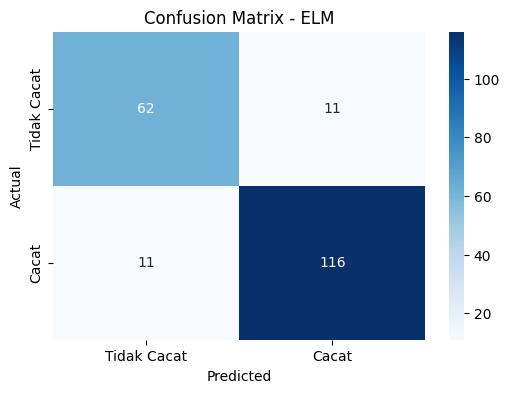

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Prediksi dulu
y_pred = elm.predict(X_test.values)

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Tidak Cacat', 'Cacat']

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ELM')
plt.show()


In [11]:
# Tampilkan classification report
print(classification_report(y_test, y_pred, target_names=labels))


              precision    recall  f1-score   support

 Tidak Cacat       0.85      0.85      0.85        73
       Cacat       0.91      0.91      0.91       127

    accuracy                           0.89       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.89      0.89      0.89       200



C:\Users\User\AppData\Local\Temp\ipykernel_10604\2775321723.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cacat', data=df, palette='pastel')


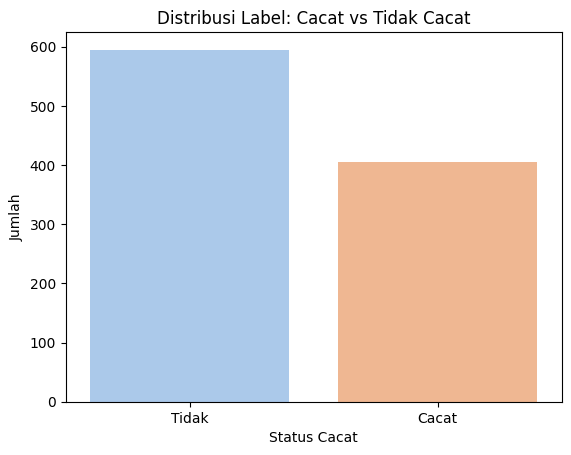

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribusi label
sns.countplot(x='Cacat', data=df, palette='pastel')
plt.title('Distribusi Label: Cacat vs Tidak Cacat')
plt.xlabel('Status Cacat')
plt.ylabel('Jumlah')
plt.show()


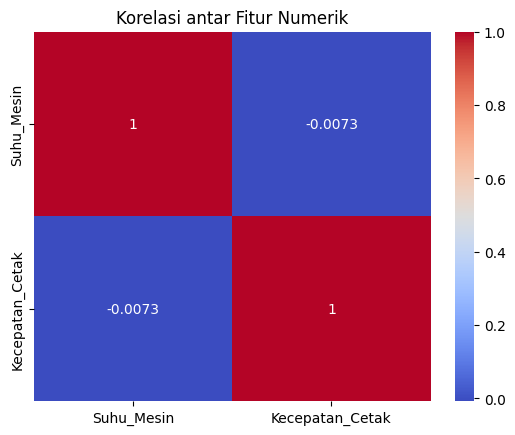

In [15]:
# Korelasi fitur numerik
corr = df[['Suhu_Mesin', 'Kecepatan_Cetak']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Korelasi antar Fitur Numerik')
plt.show()


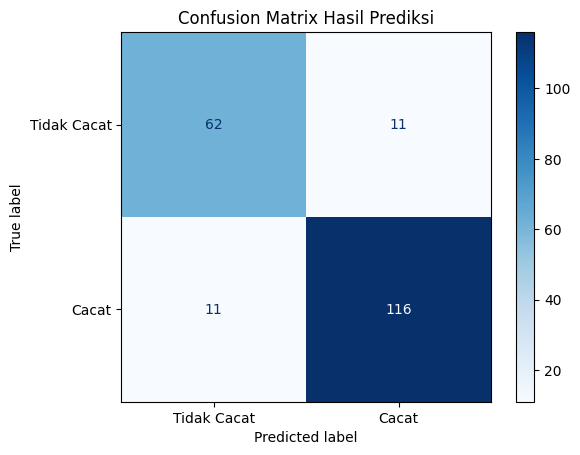

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Tidak Cacat', 'Cacat'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix Hasil Prediksi')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_10604\2130646942.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette='husl')


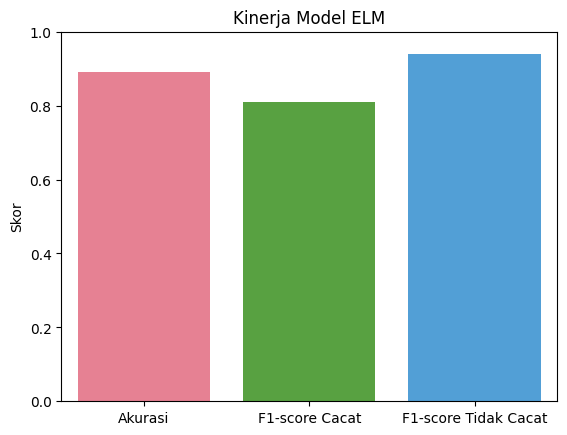

In [17]:
import numpy as np

# Contoh skor
scores = {
    'Akurasi': 0.89,
    'F1-score Cacat': 0.81,
    'F1-score Tidak Cacat': 0.94
}

sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette='husl')
plt.ylim(0, 1)
plt.title('Kinerja Model ELM')
plt.ylabel('Skor')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
import pickle

# Latih model
model = LogisticRegression()
model.fit(X_train, y_train)

# Simpan model
with open('model_lr.pkl', 'wb') as f:
    pickle.dump(model, f)


In [19]:
from sklearn.linear_model import LogisticRegression
import pickle

# Latih model
model = LogisticRegression()
model.fit(X_train, y_train)

# Simpan model
with open('model_lr.pkl', 'wb') as f:
    pickle.dump(model, f)
